# Load data set to pandas for cleaning / Transformations
- Level II

## import libs

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## setting flags

In [ ]:
pd.options.display.max_columns=500
pd.options.display.max_rows=200
# to set dataframes to show more cols & rows

## setting paths

In [ ]:
# from google.colab import files
# uploaded = files.upload()

# import os
# os.chdir('content/drive/MyDrive/PG-DBDA C-DAC Mumbai KH/Final Project/US accident/Datasets')
# os.getcwd()
# EDA_output.csv

import os
os.chdir(r'E:\Datasets\US Accidents (2016 - 2023)')
os.getcwd()

'E:\\Datasets\\US Accidents (2016 - 2023)'

## import dataset

In [ ]:
# df_cor = pd.read_csv('US_Accidents_March23.csv')
df_cor = pd.read_csv('EDA_output.csv', index_col=False)

In [ ]:
df_cor.shape

(7728394, 52)

In [ ]:
df_cor.head(2)

,ID,Source,Severity,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,Street,City,County,State,Zipcode,Country,Timezone,Airport_Code,Weather_Timestamp,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Direction,Wind_Speed(mph),Precipitation(in),Weather_Condition,Amenity,Bump,Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight,Year,MonthC,Month,Day,WeekdayC,Weekday,Hour,Time Duration (min)
0,A-1,Source2,3,39.865147,-84.058723,NaN,NaN,0.01,Right lane blocked due to accident on I-70 Eas...,I-70 E,Dayton,Montgomery,OH,45424.0,US,US/Eastern,KFFO,2016-02-08 05:58:00,36.9,NaN,91.0,29.68,10.0,Calm,NaN,0.02,Light Rain,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Night,Night,Night,2016,Feb,2,8,Mon,1,5,314.0
1,A-2,Source2,2,39.928059,-82.831184,NaN,NaN,0.01,Accident on Brice Rd at Tussing Rd. Expect del...,Brice Rd,Reynoldsburg,Franklin,OH,43068.0,US,US/Eastern,KCMH,2016-02-08 05:51:00,37.9,NaN,100.0,29.65,10.0,Calm,NaN,0.00,Light Rain,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Night,Night,Day,2016,Feb,2,8,Mon,1,6,30.0


In [ ]:
df_cor.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7728394 entries, 0 to 7728393
Data columns (total 52 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   ID                     object 
 1   Source                 object 
 2   Severity               int64  
 3   Start_Lat              float64
 4   Start_Lng              float64
 5   End_Lat                float64
 6   End_Lng                float64
 7   Distance(mi)           float64
 8   Description            object 
 9   Street                 object 
 10  City                   object 
 11  County                 object 
 12  State                  object 
 13  Zipcode                float64
 14  Country                object 
 15  Timezone               object 
 16  Airport_Code           object 
 17  Weather_Timestamp      object 
 18  Temperature(F)         float64
 19  Wind_Chill(F)          float64
 20  Humidity(%)            float64
 21  Pressure(in)           float64
 22  Visibility(mi)    

## dropping records with null values
- it is a huge data set of 7.7M records, but we needed atleast 1M records
- even if we remove null values using ```dropna()```, still we are left with 3.5M records

In [ ]:
100*df_cor.isnull().sum()/df_cor.shape[0]

ID                        0.000000
Source                    0.000000
Severity                  0.000000
Start_Lat                 0.000000
Start_Lng                 0.000000
End_Lat                  44.029355
End_Lng                  44.029355
Distance(mi)              0.000000
Description               0.000065
Street                    0.140637
City                      0.003274
County                    0.000000
State                     0.000000
Zipcode                   0.024779
Country                   0.000000
Timezone                  0.101030
Airport_Code              0.292881
Weather_Timestamp         1.555666
Temperature(F)            2.120143
Wind_Chill(F)            25.865904
Humidity(%)               2.253301
Pressure(in)              1.820288
Visibility(mi)            2.291524
Wind_Direction            2.267043
Wind_Speed(mph)           7.391355
Precipitation(in)        28.512858
Weather_Condition         2.244438
Amenity                   0.000000
Bump                

In [ ]:
df_cor.dropna(inplace=True)

In [ ]:
100*df_cor.isnull().sum()/df_cor.shape[0]

ID                       0.0
Source                   0.0
Severity                 0.0
Start_Lat                0.0
Start_Lng                0.0
End_Lat                  0.0
End_Lng                  0.0
Distance(mi)             0.0
Description              0.0
Street                   0.0
City                     0.0
County                   0.0
State                    0.0
Zipcode                  0.0
Country                  0.0
Timezone                 0.0
Airport_Code             0.0
Weather_Timestamp        0.0
Temperature(F)           0.0
Wind_Chill(F)            0.0
Humidity(%)              0.0
Pressure(in)             0.0
Visibility(mi)           0.0
Wind_Direction           0.0
Wind_Speed(mph)          0.0
Precipitation(in)        0.0
Weather_Condition        0.0
Amenity                  0.0
Bump                     0.0
Crossing                 0.0
Give_Way                 0.0
Junction                 0.0
No_Exit                  0.0
Railway                  0.0
Roundabout    

In [ ]:
df_cor.shape

(3554549, 52)

## Column Operations

### converting time cols which have"string" type to "datetime" type

In [ ]:
df_cor['Weather_Timestamp'] = pd.to_datetime(df_cor['Weather_Timestamp'], format='mixed')

### converting numeric cols which have "string" type to "int" type

In [ ]:
# df_cor['Zipcode'] = df_cor['Zipcode'].str.slice(0, 5).astype('int64')
df_cor['Zipcode'] = df_cor['Zipcode'].astype('int64')

In [ ]:
df_cor.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3554549 entries, 3402762 to 7728393
Data columns (total 52 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   ID                     object        
 1   Source                 object        
 2   Severity               int64         
 3   Start_Lat              float64       
 4   Start_Lng              float64       
 5   End_Lat                float64       
 6   End_Lng                float64       
 7   Distance(mi)           float64       
 8   Description            object        
 9   Street                 object        
 10  City                   object        
 11  County                 object        
 12  State                  object        
 13  Zipcode                int64         
 14  Country                object        
 15  Timezone               object        
 16  Airport_Code           object        
 17  Weather_Timestamp      datetime64[ns]
 18  Temperature(F)       

### listing "String" type cols

In [ ]:
# String cols
str_cols = []
for i in df_cor.columns:
    if df_cor[i].dtypes == 'object' :
        str_cols.append(i)
str_cols

['ID',
 'Source',
 'Description',
 'Street',
 'City',
 'County',
 'State',
 'Country',
 'Timezone',
 'Airport_Code',
 'Wind_Direction',
 'Weather_Condition',
 'Sunrise_Sunset',
 'Civil_Twilight',
 'Nautical_Twilight',
 'Astronomical_Twilight',
 'MonthC',
 'WeekdayC']

#### Analysing "String" type cols to remove them

In [ ]:
df_cor['ID'].nunique()

3554549

In [ ]:
df_cor['Source'].value_counts()

Source
Source1    3554549
Name: count, dtype: int64

In [ ]:
df_cor['Description'].nunique()

1446860

In [ ]:
df_cor['Street'].head(15)

3402762    Outerbelt E
3402767         I-75 S
3402771         I-71 S
3402773    Outerbelt W
3402774         I-75 N
3402776         I-90 E
3402777         I-71 N
3402782    North Fwy S
3402784        US-33 S
3402785         I-75 S
3402786    North Fwy N
3402787         I-70 E
3402788         I-75 S
3402792       US-421 S
3402794       US-421 S
Name: Street, dtype: object

In [ ]:
df_cor['County'].value_counts()

County
Los Angeles       230384
Miami-Dade        194263
Orange            147809
San Bernardino     63643
Dallas             59621
                   ...  
Ontonagon              1
Gogebic                1
Trimble                1
Mcdowell               1
Walthall               1
Name: count, Length: 1679, dtype: int64

In [ ]:
df_cor['State'].nunique()

49

In [ ]:
df_cor['Country'].unique()

array(['US'], dtype=object)

In [ ]:
df_cor['Timezone'].nunique()
# can't remove this column because US has various timezones
# remove only null value records using dropna()

4

In [ ]:
df_cor['Airport_Code'].value_counts()

Airport_Code
KMIA    61685
KCQT    60400
KOPF    53505
KORL    50910
KTMB    48170
        ...  
KD50        1
KD25        1
KCSM        1
KGLD        1
KICR        1
Name: count, Length: 1861, dtype: int64

In [ ]:
df_cor['Wind_Direction'].nunique()

23

In [ ]:
df_cor['Weather_Condition'].nunique()

122

In [ ]:
# listing top 12 categories of Weather_Condition column
top_12_weather_conditions = df_cor['Weather_Condition'].value_counts().head(12).index
top_12_weather_conditions

Index(['Fair', 'Cloudy', 'Mostly Cloudy', 'Partly Cloudy', 'Light Rain',
       'Light Snow', 'Fog', 'Rain', 'Haze', 'Fair / Windy', 'Heavy Rain',
       'Thunder in the Vicinity'],
      dtype='object', name='Weather_Condition')

In [ ]:
df_cor['Sunrise_Sunset'].unique()

array(['Night', 'Day'], dtype=object)

In [ ]:
df_cor['Civil_Twilight'].unique()

array(['Night', 'Day'], dtype=object)

In [ ]:
df_cor['Nautical_Twilight'].unique()

array(['Night', 'Day'], dtype=object)

In [ ]:
df_cor['Astronomical_Twilight'].unique()

array(['Night', 'Day'], dtype=object)

In [ ]:
df_cor['WeekdayC'].unique()

array(['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'], dtype=object)

In [ ]:
df_cor['MonthC'].unique()

array(['Feb', 'Mar', 'Apr', 'May', 'Jun', 'Nov', 'Dec', 'Jan', 'Oct',
       'Sep', 'Aug', 'Jul'], dtype=object)

#### Note for String columns
- On basis of analysis of String type columns, we have decided to remove the following columns
    - ```ID``` column has unique values, so it won't contribute anything to model
    - ```Source``` column has only one value throughout dataset, so it won't contribute anything to model
    - ```Description``` and ```Street``` have Text data which will not contribute anything to model, we can remove these columns
    - ```Zipcode``` can be used as replacement of following columns as it does not add any value to the model, so below columns can be removed
        - ```County```
        - ```Country```
        - ```State```
        - ```Airport_Code```
    - ```Sunrise_Sunset``` can be used in replacement of following columns as it does not add valy value to the model, so below columns can be removed
        - ```Civil_Twilight```
        - ```Nautical_Twilight```
        - ```Astronomical_Twilight```

    

In [ ]:
text_cols = ['ID', 'Source', 'Description', 'Street']
zip_code_replacements = ['County', 'Country', 'State', 'Airport_Code']
similar_data_cols = ['Civil_Twilight', 'Nautical_Twilight', 'Astronomical_Twilight']

### listing "Non-String" type cols

In [ ]:
# non-String cols
not_str_cols = []
for i in df_cor.columns:
    if df_cor[i].dtypes == 'int64' or df_cor[i].dtypes == 'float64' or df_cor[i].dtypes == 'bool' or df_cor[i].dtypes == 'datetime64[ns]':
        not_str_cols.append(i)
not_str_cols

['Severity',
 'Start_Lat',
 'Start_Lng',
 'End_Lat',
 'End_Lng',
 'Distance(mi)',
 'Zipcode',
 'Weather_Timestamp',
 'Temperature(F)',
 'Wind_Chill(F)',
 'Humidity(%)',
 'Pressure(in)',
 'Visibility(mi)',
 'Wind_Speed(mph)',
 'Precipitation(in)',
 'Amenity',
 'Bump',
 'Crossing',
 'Give_Way',
 'Junction',
 'No_Exit',
 'Railway',
 'Roundabout',
 'Station',
 'Stop',
 'Traffic_Calming',
 'Traffic_Signal',
 'Turning_Loop',
 'Year',
 'Month',
 'Day',
 'Weekday',
 'Hour',
 'Time Duration (min)']

In [ ]:
df_cor[not_str_cols]

,Severity,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Zipcode,Weather_Timestamp,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph),Precipitation(in),Amenity,Bump,Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Year,Month,Day,Weekday,Hour,Time Duration (min)
3402762,3,40.108910,-83.092860,40.112060,-83.031870,3.230,43017,2016-02-08 00:53:00,42.1,36.1,58.0,29.76,10.0,10.4,0.00,False,False,False,False,False,False,False,False,False,False,False,False,False,2016,2,8,1,0,360.000
3402767,3,39.172393,-84.492792,39.170476,-84.501798,0.500,45217,2016-02-08 07:53:00,37.0,29.8,93.0,29.69,10.0,10.4,0.01,False,False,False,False,False,False,False,False,False,False,False,False,False,2016,2,8,1,7,360.000
3402771,2,41.375310,-81.820170,41.367860,-81.821740,0.521,44130,2016-02-08 11:51:00,33.1,30.0,92.0,29.63,0.5,3.5,0.08,False,False,False,False,True,False,False,False,False,False,False,False,False,2016,2,8,1,11,360.000
3402773,2,40.109310,-82.968490,40.110780,-82.984000,0.826,43081,2016-02-08 15:12:00,32.0,28.7,100.0,29.59,0.5,3.5,0.05,False,False,False,False,False,False,False,False,False,False,False,False,False,2016,2,8,1,15,360.000
3402774,2,39.192880,-84.477230,39.196150,-84.473350,0.307,45216,2016-02-08 15:47:00,33.8,29.6,100.0,29.66,3.0,4.6,0.03,False,False,False,False,False,False,False,False,False,False,False,False,False,2016,2,8,1,15,360.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7728389,2,34.002480,-117.379360,33.998880,-117.370940,0.543,92501,2019-08-23 17:53:00,86.0,86.0,40.0,28.92,10.0,13.0,0.00,False,False,False,False,False,False,False,False,False,False,False,False,False,2019,8,23,5,18,28.600
7728390,2,32.766960,-117.148060,32.765550,-117.153630,0.338,92108,2019-08-23 18:53:00,70.0,70.0,73.0,29.39,10.0,6.0,0.00,False,False,False,False,False,False,False,False,False,False,False,False,False,2019,8,23,5,19,26.883
7728391,2,33.775450,-117.847790,33.777400,-117.857270,0.561,92866,2019-08-23 18:53:00,73.0,73.0,64.0,29.74,10.0,10.0,0.00,False,False,False,False,True,False,False,False,False,False,False,False,False,2019,8,23,5,19,28.467
7728392,2,33.992460,-118.403020,33.983110,-118.395650,0.772,90230,2019-08-23 18:51:00,71.0,71.0,81.0,29.62,10.0,8.0,0.00,False,False,False,False,False,False,False,False,False,False,False,False,False,2019,8,23,5,19,29.350


#### Analysing non-String cols

In [ ]:
print("Min: ", df_cor['Distance(mi)'].min())
print("Max: ", df_cor['Distance(mi)'].max())
df_cor['Distance(mi)'].head()

Min:  0.0
Max:  155.186


3402762    3.230
3402767    0.500
3402771    0.521
3402773    0.826
3402774    0.307
Name: Distance(mi), dtype: float64

In [ ]:
df_cor['Zipcode'].head(5)

3402762    43017
3402767    45217
3402771    44130
3402773    43081
3402774    45216
Name: Zipcode, dtype: int64

In [ ]:
df_cor['Weather_Timestamp'].head()
# will not remove the entire column but make sure
# to remove records with null values using dropna()

3402762   2016-02-08 00:53:00
3402767   2016-02-08 07:53:00
3402771   2016-02-08 11:51:00
3402773   2016-02-08 15:12:00
3402774   2016-02-08 15:47:00
Name: Weather_Timestamp, dtype: datetime64[ns]

#### generating correlation matrix

In [ ]:
not_str_corr = df_cor[not_str_cols].corr()
not_str_corr.round(2)

,Severity,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Zipcode,Weather_Timestamp,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph),Precipitation(in),Amenity,Bump,Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Year,Month,Day,Weekday,Hour,Time Duration (min)
Severity,1.00,0.08,0.08,0.08,0.08,0.02,-0.07,-0.13,-0.04,-0.04,0.03,-0.05,-0.01,0.00,0.00,-0.00,-0.00,-0.03,0.01,0.03,-0.00,0.00,-0.00,-0.02,0.00,-0.00,-0.00,NaN,-0.12,-0.02,0.00,-0.01,-0.01,0.01
Start_Lat,0.08,1.00,-0.13,1.00,-0.13,0.08,0.05,-0.07,-0.48,-0.48,0.02,-0.28,-0.14,0.01,-0.01,-0.01,-0.01,-0.14,0.01,0.05,-0.02,0.00,-0.00,-0.12,-0.02,-0.01,-0.05,NaN,-0.07,-0.00,0.01,-0.01,-0.01,-0.03
Start_Lng,0.08,-0.13,1.00,-0.13,1.00,-0.00,-0.97,0.13,0.04,0.02,0.17,0.24,0.01,0.10,0.03,0.02,-0.01,0.07,0.02,-0.01,0.01,-0.01,0.00,0.03,-0.03,-0.00,0.05,NaN,0.12,0.01,-0.00,0.01,0.01,0.00
End_Lat,0.08,1.00,-0.13,1.00,-0.13,0.08,0.05,-0.07,-0.48,-0.48,0.02,-0.28,-0.14,0.01,-0.01,-0.01,-0.01,-0.14,0.01,0.05,-0.02,0.00,-0.00,-0.12,-0.02,-0.01,-0.05,NaN,-0.07,-0.00,0.01,-0.01,-0.01,-0.03
End_Lng,0.08,-0.13,1.00,-0.13,1.00,-0.00,-0.97,0.13,0.04,0.02,0.17,0.24,0.01,0.10,0.03,0.02,-0.01,0.07,0.02,-0.01,0.01,-0.01,0.00,0.03,-0.03,-0.00,0.05,NaN,0.12,0.01,-0.00,0.01,0.01,0.00
Distance(mi),0.02,0.08,-0.00,0.08,-0.00,1.00,-0.01,0.10,-0.06,-0.07,0.02,-0.09,-0.06,0.02,0.01,-0.04,-0.01,-0.11,-0.01,0.03,-0.01,-0.02,-0.00,-0.06,-0.04,-0.01,-0.10,NaN,0.09,0.01,0.00,0.00,-0.04,0.01
Zipcode,-0.07,0.05,-0.97,0.05,-0.97,-0.01,1.00,-0.12,-0.01,0.00,-0.16,-0.23,-0.01,-0.07,-0.03,-0.01,0.01,-0.06,-0.03,0.00,-0.01,0.02,-0.00,-0.02,0.03,0.00,-0.04,NaN,-0.11,-0.01,0.00,-0.00,-0.01,0.02
Weather_Timestamp,-0.13,-0.07,0.13,-0.07,0.13,0.10,-0.12,1.00,0.03,0.03,-0.01,0.01,0.01,0.01,-0.00,0.01,0.00,-0.01,-0.00,-0.07,0.00,-0.01,0.00,0.00,0.01,0.00,-0.06,NaN,0.95,0.02,0.00,0.01,0.02,-0.01
Temperature(F),-0.04,-0.48,0.04,-0.48,0.04,-0.06,-0.01,0.03,1.00,0.99,-0.36,0.20,0.28,0.06,-0.01,0.02,0.01,0.09,-0.01,-0.03,0.01,0.01,0.00,0.07,0.02,0.01,0.04,NaN,-0.00,0.10,-0.02,0.02,0.17,0.00
Wind_Chill(F),-0.04,-0.48,0.02,-0.48,0.02,-0.07,0.00,0.03,0.99,1.00,-0.35,0.21,0.28,0.00,-0.01,0.02,0.01,0.09,-0.01,-0.03,0.01,0.01,0.00,0.07,0.02,0.01,0.04,NaN,-0.01,0.11,-0.02,0.02,0.16,0.00


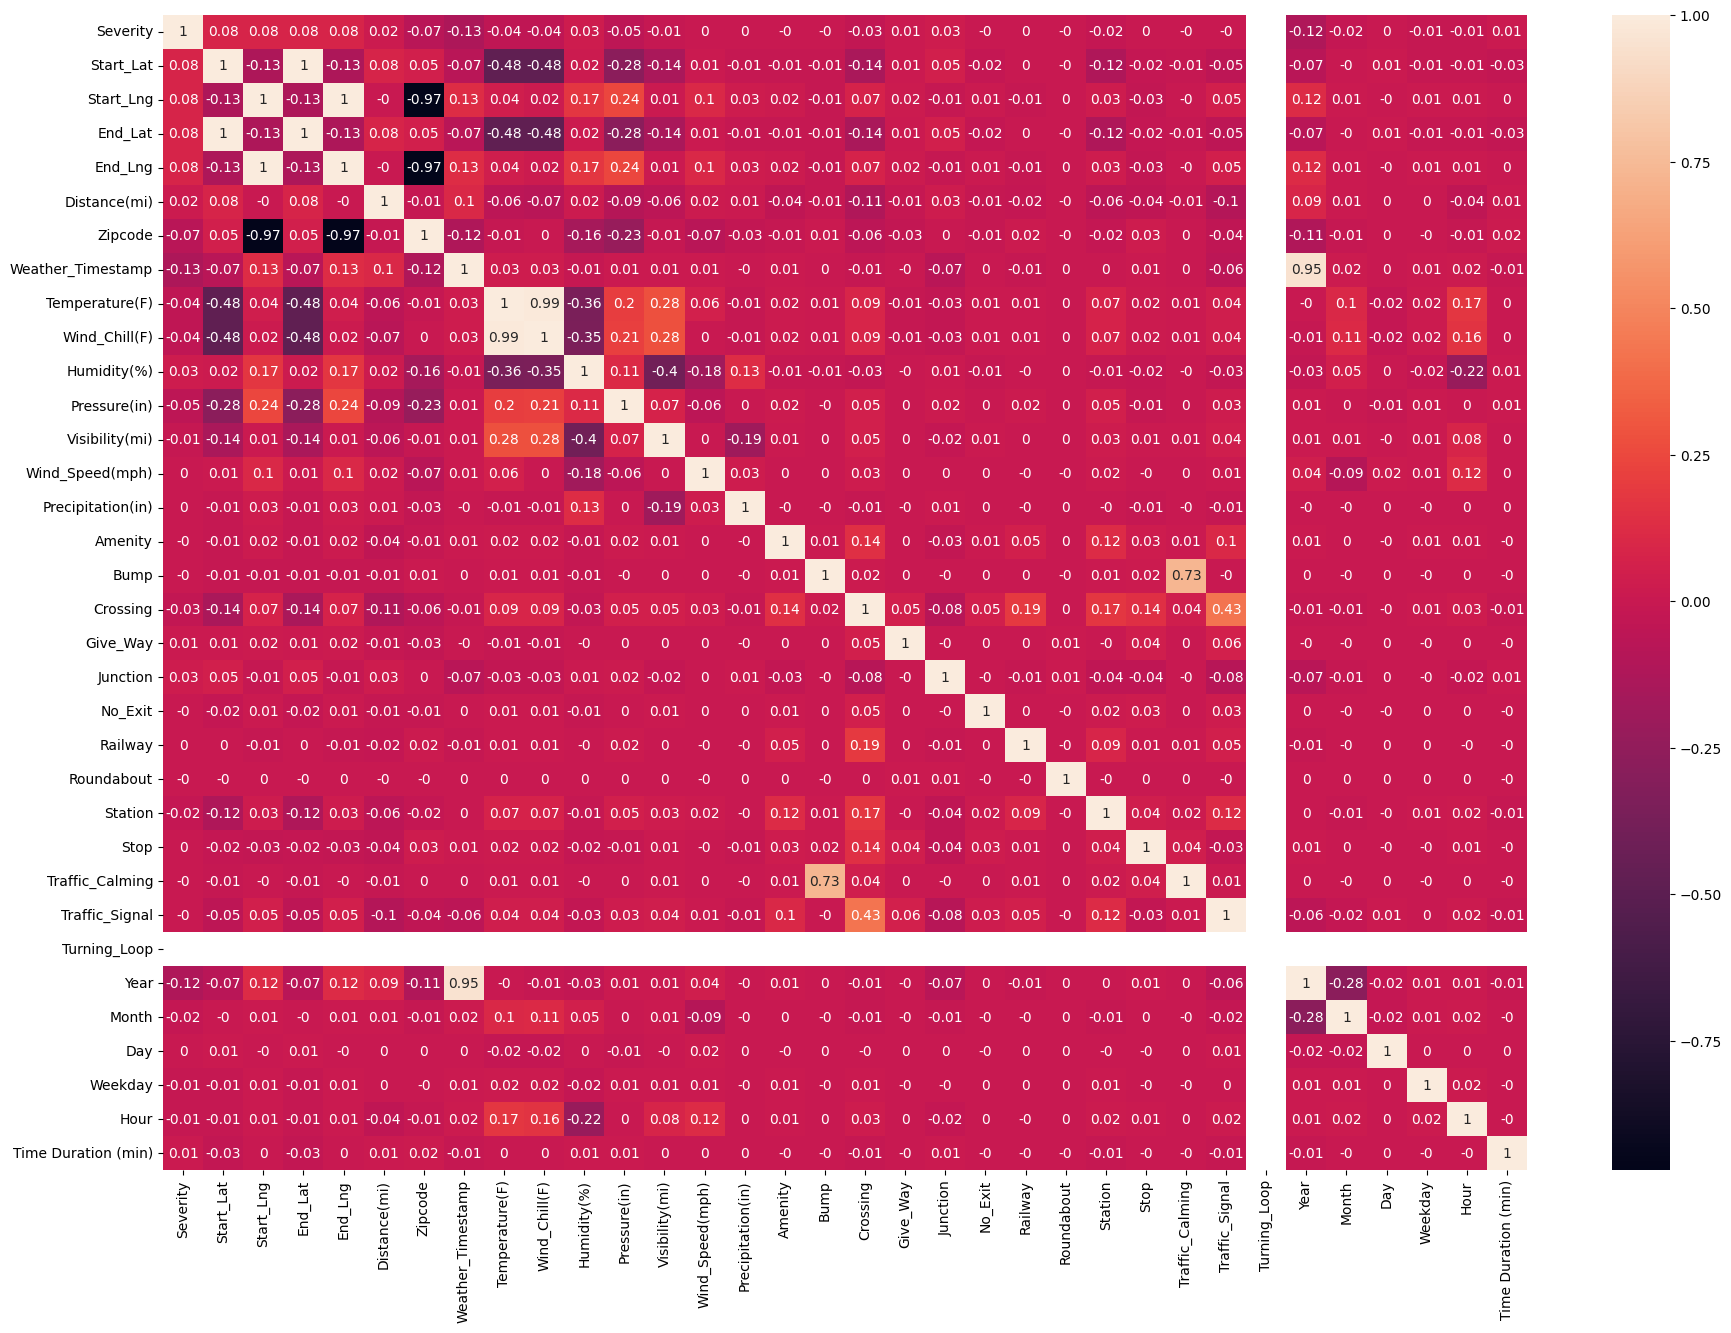

In [ ]:
plt.figure(figsize=(22, 15))
sns.heatmap(not_str_corr.round(2), annot=True)
plt.show()

#### Note for Non-String columns
- On the basis of correlation matrix and its heatmap for Non-String type columns
    - ```Weather_Timestamp```, ```Visibility(mi)```, ```Give_Way```, ```Roundabout``` have low correlation with target variable ```Severity```, so we are removing these columns
        - ```Weather_Timestamp```
        - ```Visibility(mi)```
        - ```Give_Way```
        - ```Roundabout```
    - ```Traffic_Calming``` has high correlation with ```Bump```, so we're removing ```Traffic_Calming``` column
    - ```Traffic_Signal``` has high correlation with ```Crossing```, so we're removing ```Traffic_Signal``` column
    - ```Turning_Loop``` is showing ```NaN``` in correlation, so we're removing ```Turning_Loop```
- On basis of analysis of Non-String type columns, we have decided to remove the following columns
    - ```Unnamed: 0``` has unique ID like values, which won't contribute anything to model, we can remove ```Unnamed: 0``` column

In [ ]:
inter_high_corr = ['Traffic_Calming', 'Traffic_Signal', 'Turning_Loop']
low_corr_with_target = ['Weather_Timestamp', 'Visibility(mi)', 'Give_Way', 'Roundabout']
id_like_unique = ['Unnamed: 0']

### Dropping columns

In [ ]:
df_cor.drop(inter_high_corr, axis=1, inplace=True)

In [ ]:
df_cor.drop(low_corr_with_target, axis=1, inplace=True)

In [ ]:
df_cor.drop(text_cols, axis=1, inplace=True)

In [ ]:
df_cor.drop(zip_code_replacements, axis=1, inplace=True)

In [ ]:
df_cor.drop(similar_data_cols, axis=1, inplace=True)

In [ ]:
df_cor.shape

(3554549, 34)

In [ ]:
df_cor.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3554549 entries, 3402762 to 7728393
Data columns (total 34 columns):
 #   Column               Dtype  
---  ------               -----  
 0   Severity             int64  
 1   Start_Lat            float64
 2   Start_Lng            float64
 3   End_Lat              float64
 4   End_Lng              float64
 5   Distance(mi)         float64
 6   City                 object 
 7   Zipcode              int64  
 8   Timezone             object 
 9   Temperature(F)       float64
 10  Wind_Chill(F)        float64
 11  Humidity(%)          float64
 12  Pressure(in)         float64
 13  Wind_Direction       object 
 14  Wind_Speed(mph)      float64
 15  Precipitation(in)    float64
 16  Weather_Condition    object 
 17  Amenity              bool   
 18  Bump                 bool   
 19  Crossing             bool   
 20  Junction             bool   
 21  No_Exit              bool   
 22  Railway              bool   
 23  Station              bool   
 2

In [ ]:
df_cor.dropna(inplace=True)

In [ ]:
df_cor.shape

(3554549, 34)

In [ ]:
df_cor.head()

,Severity,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),City,Zipcode,Timezone,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Wind_Direction,Wind_Speed(mph),Precipitation(in),Weather_Condition,Amenity,Bump,Crossing,Junction,No_Exit,Railway,Station,Stop,Sunrise_Sunset,Year,MonthC,Month,Day,WeekdayC,Weekday,Hour,Time Duration (min)
3402762,3,40.108910,-83.092860,40.112060,-83.031870,3.230,Dublin,43017,US/Eastern,42.1,36.1,58.0,29.76,SW,10.4,0.00,Light Rain,False,False,False,False,False,False,False,False,Night,2016,Feb,2,8,Mon,1,0,360.0
3402767,3,39.172393,-84.492792,39.170476,-84.501798,0.500,Cincinnati,45217,US/Eastern,37.0,29.8,93.0,29.69,WSW,10.4,0.01,Light Rain,False,False,False,False,False,False,False,False,Day,2016,Feb,2,8,Mon,1,7,360.0
3402771,2,41.375310,-81.820170,41.367860,-81.821740,0.521,Cleveland,44130,US/Eastern,33.1,30.0,92.0,29.63,SW,3.5,0.08,Snow,False,False,False,True,False,False,False,False,Day,2016,Feb,2,8,Mon,1,11,360.0
3402773,2,40.109310,-82.968490,40.110780,-82.984000,0.826,Westerville,43081,US/Eastern,32.0,28.7,100.0,29.59,West,3.5,0.05,Snow,False,False,False,False,False,False,False,False,Day,2016,Feb,2,8,Mon,1,15,360.0
3402774,2,39.192880,-84.477230,39.196150,-84.473350,0.307,Cincinnati,45216,US/Eastern,33.8,29.6,100.0,29.66,NNW,4.6,0.03,Light Snow,False,False,False,False,False,False,False,False,Day,2016,Feb,2,8,Mon,1,15,360.0


## Row Operations

### Dropping rows

In [ ]:
top_12_weather_conditions
df_cor = df_cor[df_cor['Weather_Condition'].isin(top_12_weather_conditions)]
# get only top 12 and create new data

In [ ]:
df_cor.shape

(3414595, 34)

#### Note for dropping rows
- On the basis of top records, we can are keeping only records some top frequencies for column ```Weather_Condition```
    -

## null value count check before exporting CSV

In [ ]:
100*df_cor.isnull().sum()/df_cor.shape[0]

Severity               0.0
Start_Lat              0.0
Start_Lng              0.0
End_Lat                0.0
End_Lng                0.0
Distance(mi)           0.0
City                   0.0
Zipcode                0.0
Timezone               0.0
Temperature(F)         0.0
Wind_Chill(F)          0.0
Humidity(%)            0.0
Pressure(in)           0.0
Wind_Direction         0.0
Wind_Speed(mph)        0.0
Precipitation(in)      0.0
Weather_Condition      0.0
Amenity                0.0
Bump                   0.0
Crossing               0.0
Junction               0.0
No_Exit                0.0
Railway                0.0
Station                0.0
Stop                   0.0
Sunrise_Sunset         0.0
Year                   0.0
MonthC                 0.0
Month                  0.0
Day                    0.0
WeekdayC               0.0
Weekday                0.0
Hour                   0.0
Time Duration (min)    0.0
dtype: float64

## exporting CSV

In [ ]:
df_cor.to_csv('Transformations_output.csv', index=False)

In [ ]:
# del df_cor